<a href="https://colab.research.google.com/github/harshit57709/AI/blob/master/MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [0]:
random.seed(0)

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
X_train.shape

(60000, 28, 28)

In [0]:
X_test.shape

(10000, 28, 28)

In [0]:
assert(X_train.shape[0]==y_train.shape[0]),"The number of images is not equal to the no. of labels in train data"
assert(X_test.shape[0]==y_test.shape[0]),"The number of images is not equal to the no. of labels in test data"
assert(X_train.shape[1:]== (28,28)),"Pixels not as desired"

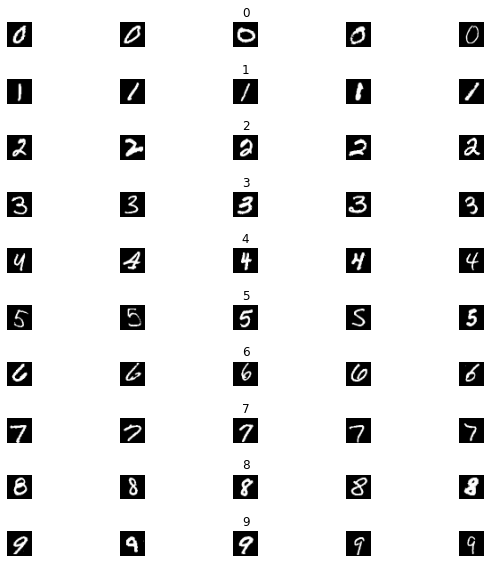

In [0]:
num_of_samples = []
cols = 5
num_classes = 10
fig, axs = plt.subplots(nrows= num_classes, ncols= cols, figsize= (8,8))
fig.tight_layout()
for i in range(num_classes):
  for j in range(cols):
    selected = X_train[y_train==i]
    axs[i][j].imshow(selected[random.randint(0,len(selected)-1),:,:],cmap = plt.get_cmap("gray"))
    axs[i][j].axis('off')
    if(j==2):
      axs[i][j].set_title(str(i))
      num_of_samples.append(len(selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'No. of images')

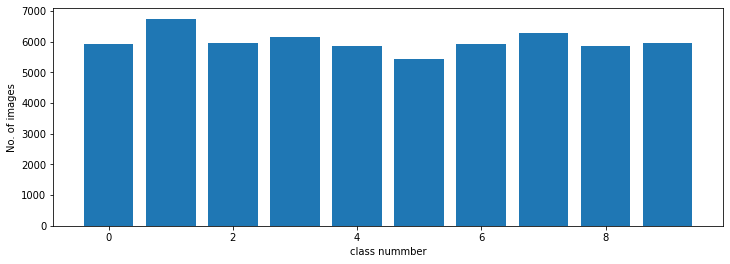

In [0]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0, num_classes),num_of_samples)
plt.xlabel("class nummber")
plt.ylabel("No. of images")

In [0]:
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

In [0]:
X_train = X_train/255
X_test  = X_test/255

In [0]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

In [0]:
print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [0]:
def create_model():
  model = Sequential()
  model.add(Dense(10, input_dim=num_pixels, activation="relu"))
  model.add(Dense(30, activation="relu"))
  model.add(Dense(10, activation="relu"))
  model.add(Dense(num_classes, activation="softmax"))
  model.compile(Adam(lr=0.01), loss="categorical_crossentropy", metrics=['accuracy'])
  return model

In [0]:
model = create_model()
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_12 (Dense)             (None, 30)                330       
_________________________________________________________________
dense_13 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
history = model.fit(X_train, y_train, validation_split = 0.1, epochs= 10, batch_size = 200, verbose=1, shuffle =1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 21us/step - loss: 0.5260 - accuracy: 0.8338 - val_loss: 0.2389 - val_accuracy: 0.9320
Epoch 2/10
54000/54000 [==============================] - 1s 21us/step - loss: 0.2558 - accuracy: 0.9240 - val_loss: 0.2169 - val_accuracy: 0.9388
Epoch 3/10
54000/54000 [==============================] - 1s 21us/step - loss: 0.2297 - accuracy: 0.9313 - val_loss: 0.1812 - val_accuracy: 0.9493
Epoch 4/10
54000/54000 [==============================] - 1s 19us/step - loss: 0.2146 - accuracy: 0.9355 - val_loss: 0.1882 - val_accuracy: 0.9440
Epoch 5/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.2041 - accuracy: 0.9394 - val_loss: 0.1615 - val_accuracy: 0.9527
Epoch 6/10
54000/54000 [==============================] - 1s 21us/step - loss: 0.1900 - accuracy: 0.9440 - val_loss: 0.1633 - val_accuracy: 0.9507
Epoch 7/10
54000/54000 [==============================] - 1s 20us/ste

Text(0.5, 1.0, 'loss')

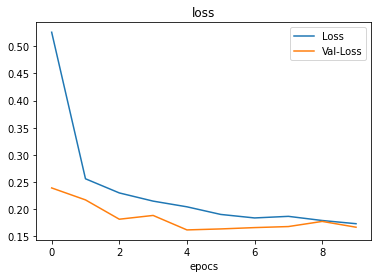

In [0]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["Loss","Val-Loss"])
plt.xlabel("epocs")
plt.title("loss")

clearly loss and val-loss starts to approach each other indication start of overfitting if epochs where 30 loss(val) would have became greater than the loss

Text(0.5, 1.0, 'acc')

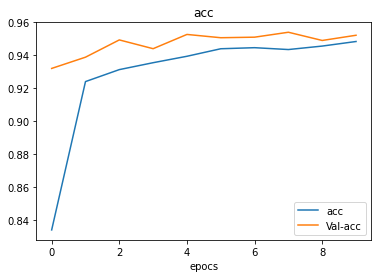

In [0]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["acc","Val-acc"])
plt.xlabel("epocs")
plt.title("acc")

In [0]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))

<class 'list'>


In [0]:
print("test error is {}, test accuracy is {}".format(score[0], score[1]))

test error is 0.19555025439038873, test accuracy is 0.9440000057220459


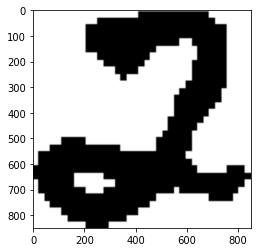

In [0]:
import requests
from PIL import Image
url ='https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)

In [0]:
img_array = np.asarray(img)
img_array.shape

(850, 850, 4)

In [0]:
import cv2
resized = cv2.resize(img_array, (28, 28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY)
print(gray_scale.shape)

(28, 28)


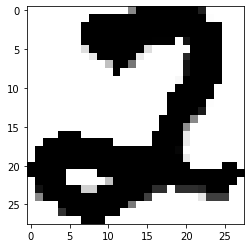

In [0]:
plt.imshow(gray_scale, cmap = plt.get_cmap("gray")) 

In [0]:
#problem remaining is NN was trained on images with black background but in this images we have a opposite senerio

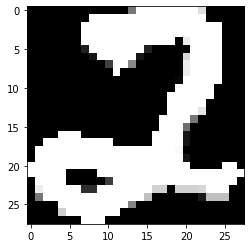

In [0]:
final_image = cv2.bitwise_not(gray_scale)
plt.imshow(final_image, cmap = plt.get_cmap("gray"))

In [0]:
final_image = final_image/255
final_image = final_image.reshape(1,784)
final_image.shape

(1, 784)

In [0]:
prediction = model.predict_classes(final_image)
print("prediction is", str(prediction))

prediction is [2]


In [0]:
import requests
from PIL import Image
url ='https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)
plt.imshow(gray_scale, cmap = plt.get_cmap("gray"))
final_image = cv2.bitwise_not(gray_scale)
plt.imshow(final_image, cmap = plt.get_cmap("gray"))
final_image = final_image/255
final_image = final_image.reshape(1,784)
final_image.shape
prediction = model.predict_classes(final_image)
print("prediction is", str(prediction))